In [1]:
"""
Example of building a Multi-layer Perceptron with PyTorch
Shows how to use optimizer to simplify steps

"""

import torch
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import time

D:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Display contour plot of f at all points (x[i],y[j])
def contour_plot1(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])
    X=torch.tensor(p,dtype=torch.float32)
    fp=f(X)
    z=fp.reshape(xx.shape).detach().numpy()
    plt.contourf(x,y,z,n_levels)

In [3]:
Xnp, ynp = make_blobs(n_samples=150, centers = [(1, 1), (5, 3), (7, 1)], n_features=2)
ynp[ynp==2]=0 # Blob2 relabelled as 0

X=torch.tensor(Xnp,dtype=torch.float32)
y=torch.tensor(ynp[:,np.newaxis],dtype=torch.float32)

N_hidden=10  # Number of dimensions of hidden layer

In [4]:
# Use the nn package to define a model as a sequence of layers. 
# nn.Sequential is a Module which contains other Modules, 
# and applies them in sequence to produce its output. 
# Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, N_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(N_hidden, 1),
    torch.nn.Sigmoid()
)

# Use Binary Cross Entropy as loss function.
loss_fn = torch.nn.BCELoss()

# Define optimizer and show it the parameters
learning_rate=0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_its=5000  # Number of iterations


In [5]:
start_time=time.perf_counter()

for t in range(n_its):
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    if ((t+1)%200==0):  # Print every 200th result
        print(t+1, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. 
    loss.backward()

    # Use the optimizer to update the weights
    optimizer.step()
         
end_time=time.perf_counter()
print("Total time spent optimizing: {:0.1f}sec.".format(end_time-start_time))


200 0.5179479718208313
400 0.417498916387558
600 0.340017706155777
800 0.28021785616874695
1000 0.24052681028842926
1200 0.21534772217273712
1400 0.19876736402511597
1600 0.18740786612033844
1800 0.1793214976787567
2000 0.1733560711145401
2200 0.1688104271888733
2400 0.1652446687221527
2600 0.16237451136112213
2800 0.16000908613204956
3000 0.15801535546779633
3200 0.156293585896492
3400 0.1547485738992691
3600 0.15319079160690308
3800 0.1513810008764267
4000 0.14977920055389404
4200 0.14852218329906464
4400 0.1475057154893875
4600 0.14664636552333832
4800 0.14588358998298645
5000 0.14517299830913544
Total time spent optimizing: 3.6sec.


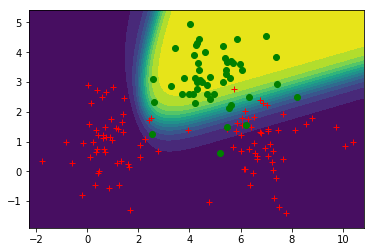

In [6]:
# Create a grid of points
px = np.arange(Xnp[:,0].min()-0.5, Xnp[:,0].max()+0.5, 0.1)
py = np.arange(Xnp[:,1].min()-0.5, Xnp[:,1].max()+0.5, 0.1)


# Use different colours for different classes
X0=Xnp[ynp==0] # Select samples for class 0
X1=Xnp[ynp==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(px,py,model,15)
